In [2]:
#### Estimating the values of N, delta and alpha for Order Statistics Bounding technique ####
import numpy as np
from scipy.stats import beta, uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Sample of size N from a uniform distribution 
trials = 1000
delta_left = 0.5
delta_right = 1.0
points = 1000
obs_list = list()
N_values = [50,100,200,400]
# N_values = [50]

for N in N_values:
    for delta in np.linspace(delta_left, delta_right, points):  # Values of delta
        
        samples = np.random.uniform(size=(trials, N))
        ord_stats = np.sort(samples, 1)
        
        u_limit = np.array([beta.ppf(q=(1+delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])
        l_limit = np.array([beta.ppf(q=(1-delta)/2.0, a=i, b=N-i+1) for i in range(1, N+1)])
        
        ord_stats_cdf = uniform.ppf(ord_stats)
        violation_counter = 0.0
        
        for t in range(trials):
            for i, cdf_value in enumerate(ord_stats_cdf[t,:]):
                if cdf_value > u_limit[i] or cdf_value < l_limit[i]:
                    violation_counter += 1.0
                    break
                    
        est_alpha_prime = violation_counter / trials
        obs_list.append([N, delta, 1.0 - est_alpha_prime])

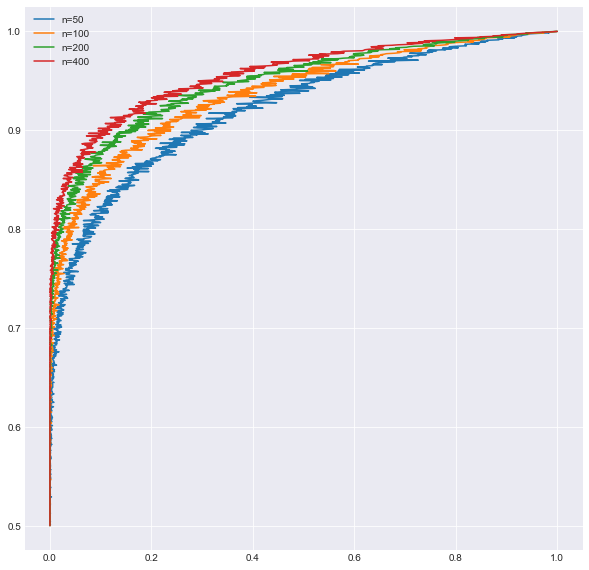

In [4]:
df = pd.DataFrame(data=obs_list, columns=["N", "delta", "alpha"])
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

sns.set_style("darkgrid")
new_df = df[df["delta"] > 0.5]

plt.subplot()
for N in N_values:
    alpha_values = new_df[new_df["N"] == N].loc[:, ["alpha"]]
    delta = new_df[new_df["N"] == N].loc[:, ["delta"]]
    plt.plot(alpha_values, delta, label="n=" + str(N))
plt.legend(loc="best")
plt.show()

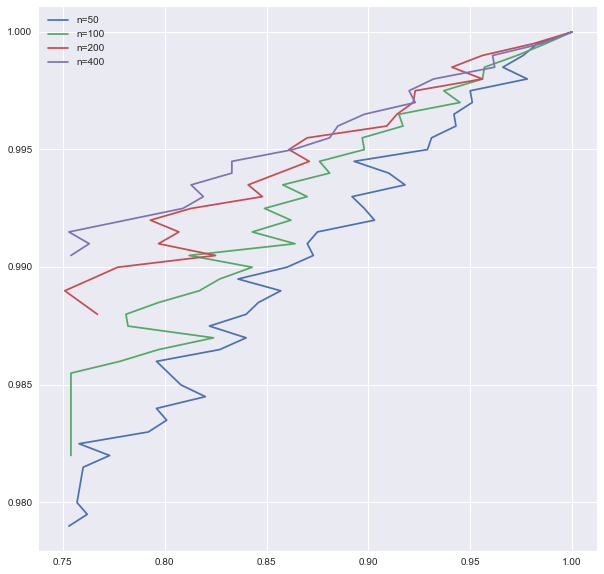

In [5]:
min_alpha = 0.75


plt.subplot()
for N in N_values:
    alpha_bool = np.logical_and((df["N"] == N),(df["alpha"] > min_alpha))
    alpha_values = df[alpha_bool].loc[:, ["alpha"]]
    delta_values = df[alpha_bool].loc[:, ["delta"]]

    plt.plot(alpha_values, delta_values, label="n=" + str(N))
plt.legend(loc="best")
plt.show()